The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

File name: medical_examination.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
medical_df=pd.read_csv('medical_examination.csv',
                      index_col=[0])

In [3]:
medical_df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Create a chart similar to where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

###### 1- Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [4]:
medical_df['Overweight']=medical_df['weight']/(pow(medical_df['height']/100,2))>25
medical_df['Overweight']=medical_df["Overweight"].replace([False,True],[0,1])

In [5]:
medical_df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


###### 2- Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [6]:
medical_df[['cholesterol','gluc']]=medical_df[['cholesterol','gluc']].replace(1,0)
medical_df[['cholesterol','gluc']]=medical_df[['cholesterol','gluc']].replace([2,3],1)

In [7]:
medical_df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


### When Cardio Equal 0

In [8]:
ch0=medical_df[medical_df['cardio']==0]['cholesterol'].value_counts()
al0=medical_df[medical_df['cardio']==0]['alco'].value_counts()
ac0=medical_df[medical_df['cardio']==0]['active'].value_counts()
gl0=medical_df[medical_df['cardio']==0]['gluc'].value_counts()
sm0=medical_df[medical_df['cardio']==0]['smoke'].value_counts()

In [9]:
dict0={
    'cholesterol':"",
    'alco':"",
    'active':'',
    'gluc':'',
    'smoke':''
}

In [10]:
dict0['cholesterol']=dict(ch0)
dict0['alco']=dict(al0)
dict0['active']=dict(ac0)
dict0['gluc']=dict(gl0)
dict0['smoke']=dict(sm0)

In [11]:
pd_new0=pd.DataFrame.from_dict(dict0,orient='index')


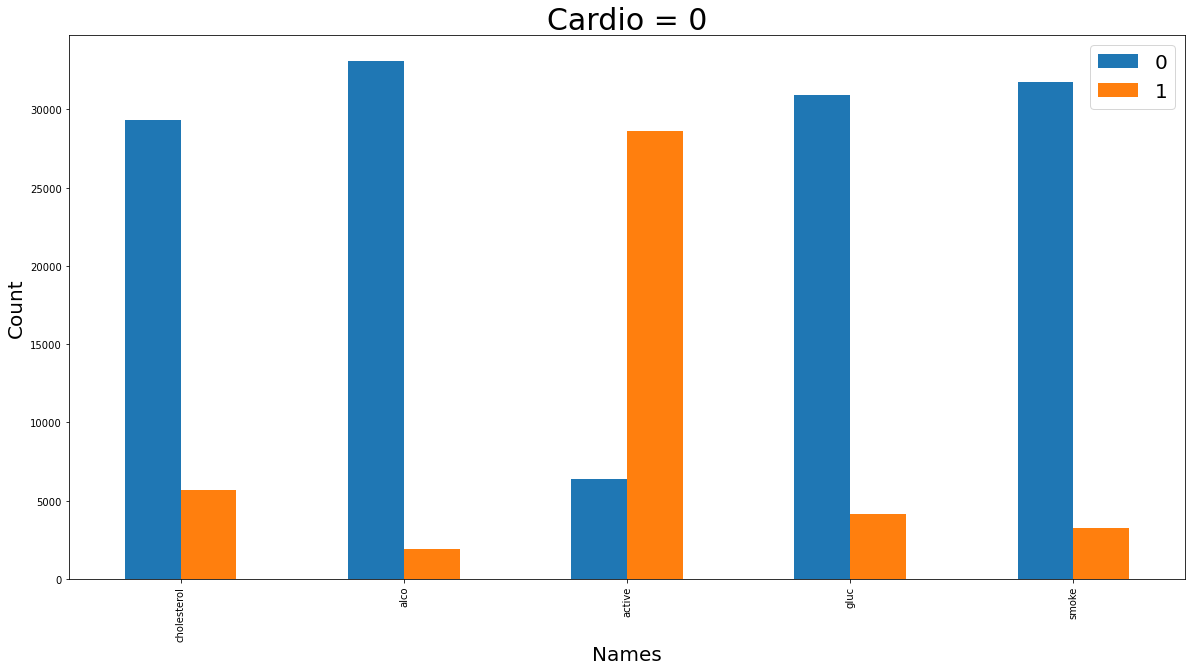

In [12]:
pd_new0.plot(figsize=(20,10),kind='bar')
plt.title('Cardio = 0',size=30)
plt.xlabel('Names',size=20)
plt.ylabel('Count',size=20)
plt.legend(prop={'size':20})

### when cardio = 1

In [13]:
ch1=medical_df[medical_df['cardio']==1]['cholesterol'].value_counts()
al1=medical_df[medical_df['cardio']==1]['alco'].value_counts()
ac1=medical_df[medical_df['cardio']==1]['active'].value_counts()
gl1=medical_df[medical_df['cardio']==1]['gluc'].value_counts()
sm1=medical_df[medical_df['cardio']==1]['smoke'].value_counts()

In [14]:
dict1={
    'cholesterol':"",
    'alco':"",
    'active':'',
    'gluc':'',
    'smoke':''
}

In [15]:
dict1['cholesterol']=dict(ch1)
dict1['alco']=dict(al1)
dict1['active']=dict(ac1)
dict1['gluc']=dict(gl1)
dict1['smoke']=dict(sm1)

In [16]:
pd_new1=pd.DataFrame.from_dict(dict1,orient='index')

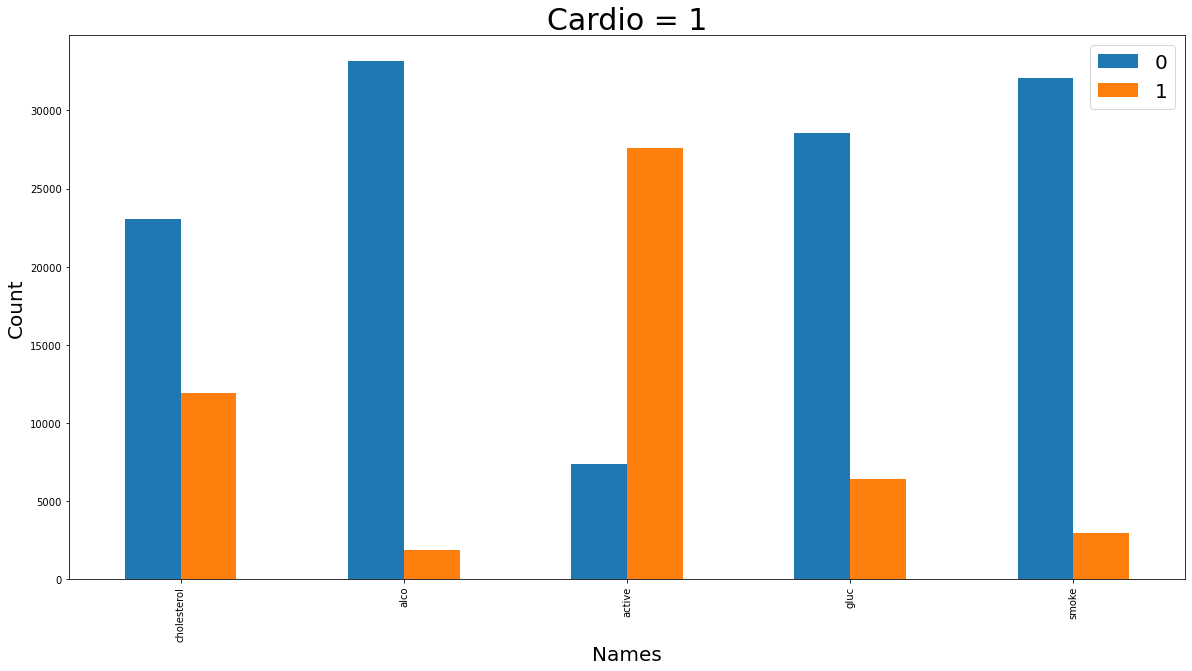

In [17]:
pd_new1.plot(figsize=(20,10),kind='bar')
plt.title('Cardio = 1',size=30)
plt.xlabel('Names',size=20)
plt.ylabel('Count',size=20)
plt.legend(prop={'size':20})

Clean the data. Filter out the following patient segments that represent incorrect data:
- diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))

In [18]:
data_incorrect=medical_df[medical_df['ap_lo']> medical_df['ap_hi']].index

In [19]:
data_incorrect

Int64Index([  314,   334,   357,   458,   482,   680,   681,   805,   815,
              886,
            ...
            99235, 99305, 99328, 99334, 99454, 99659, 99798, 99807, 99816,
            99955],
           dtype='int64', name='id', length=1234)

In [20]:
len(data_incorrect)

1234

In [21]:
medical_df.drop(data_incorrect,inplace=True)

In [22]:
len(medical_df)

68766

- height is less than the 2.5th percentile (Keep the correct data with   (df['height'] >= df['height'].quantile(0.025)))

In [23]:
data_height_incorrect=medical_df[medical_df['height']<medical_df['height'].quantile(0.025)].index

In [24]:
len(data_height_incorrect)

1506

In [25]:
medical_df.drop(data_height_incorrect,inplace=True)

In [26]:
medical_df['height'].value_counts()

165    5759
160    4937
170    4610
168    4330
164    3344
158    3254
162    3203
169    2754
156    2708
167    2497
163    2486
172    1976
159    1964
166    1943
157    1785
175    1776
155    1741
161    1675
174    1535
154    1415
171    1284
178    1203
152    1129
176    1112
173    1055
153    1039
150    1027
180     859
151     600
177     448
179     411
182     322
185     225
181     188
183     155
184     150
186     102
187      75
188      45
190      40
189      36
198      14
192      12
191      11
193       6
196       6
195       6
197       4
194       2
207       1
250       1
Name: height, dtype: int64

- height is more than the 97.5th percentile

In [27]:
medical_df['height'].quantile(0.975)

180.0

In [28]:
data_height2_incorrect=medical_df[medical_df['height']>medical_df['height'].quantile(0.975)]['height'].index

In [29]:
medical_df.drop(data_height2_incorrect,inplace=True)

In [30]:
len(medical_df)

65859

- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile

In [31]:
print(medical_df['weight'].quantile(0.025))
print(medical_df['weight'].quantile(0.975))

52.0
106.0


In [32]:
data_weight_incorrect=medical_df[medical_df['weight']<medical_df['weight'].quantile(0.025)]['weight'].index
len(data_weight_incorrect)

1475

In [33]:
medical_df.drop(data_weight_incorrect,inplace=True)

########

In [34]:
data_weight2_incorrect=medical_df[medical_df['weight']>medical_df['weight'].quantile(0.975)]['weight'].index

In [35]:
len(data_weight2_incorrect)

1600

In [36]:
medical_df.drop(data_weight2_incorrect,inplace=True)

In [37]:
len(medical_df)

62784

In [38]:
medical_df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap() to explain correlation between all variables at DataFrame columns

In [39]:
import seaborn as sns

In [60]:
medical_df_correlation=medical_df.corr()

<AxesSubplot:>

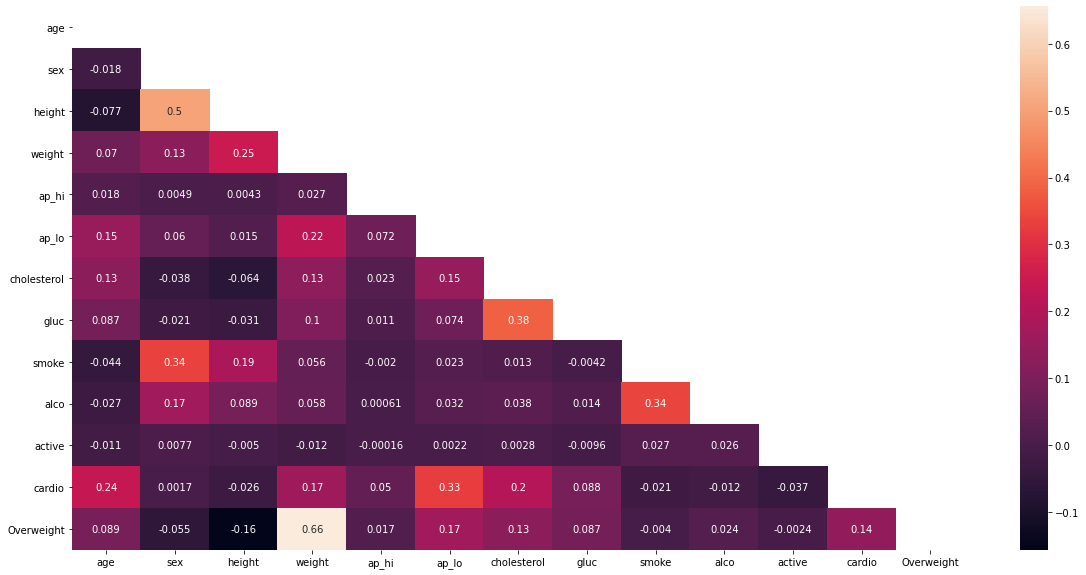

In [61]:
plt.figure(figsize=(20,10))
mask=np.triu(np.ones_like(medical_df_correlation,dtype=bool))
sns.heatmap(medical_df_correlation,annot=True,mask=mask)